In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import numpy as np
from scipy.fftpack import rfft, rfftfreq #fourier transformation package
import pywt

In [7]:
heated = ["25-1","25-2","25-3","250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_b = ["250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
room_w = ["250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
sat_b = ["250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]
sat_w = ["250-1","250-2","250-3","500-1","500-2","500-3","750-1","750-2","750-3","1000-1","1000-2","1000-3"]

In [41]:
df = pd.read_csv("./CSV/Heated/750-1.csv")
df.drop(df.index[0:14],0,inplace=True)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df.drop(df.index[0:2], inplace=True)
df = df.reset_index(drop=True)
df.drop(df.columns[[1, 11, 12, 13]], axis=1, inplace=True)
df

,ID,Date & Time,Measurement Type,Velocity [m/s],Time 1 [µs],Time 2 [µs],Distance [m],Crack Depth [m],Correction Factor,Ambient Temperature [°C],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,42155,27.5.2018 1:46:45,Direct (default),1526,66.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-83.9,-100.0,-100.0
1,42154,27.5.2018 1:46:44,Direct (default),1549,65.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-77.4,-100.0,-100.0
2,42153,27.5.2018 1:46:43,Direct (default),1549,65.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-75.7,-100.0,-100.0
3,42152,27.5.2018 1:46:42,Direct (default),1549,65.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-70.9,-100.0,-100.0
4,42151,27.5.2018 1:46:41,Direct (default),1514,66.7,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-58.2,-100.0,-100.0
5,42150,27.5.2018 1:46:40,Direct (default),1503,67.2,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,-6.6,-100.0,-100.0
6,42149,27.5.2018 1:46:39,Direct (default),1485,68,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,64.2,-100.0,-100.0
7,42148,27.5.2018 1:46:38,Direct (default),1494,67.6,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,58.8,-100.0,-100.0
8,42147,27.5.2018 1:46:37,Direct (default),1485,68,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,43.2,-100.0,-100.0
9,42146,27.5.2018 1:46:36,Direct (default),1477,68.4,0,0.101,0,1,30.5,...,99.8,99.8,99.8,99.8,99.8,99.8,99.8,12.6,-100.0,-100.0


In [33]:
w_size = (16,6) #waveform plot size
f_size = (16,8) #frequency plot size
time = np.arange(start=0, stop=199, step=0.5)

Text(0.5, 1.0, 'H25 Sample 1 Waveform')

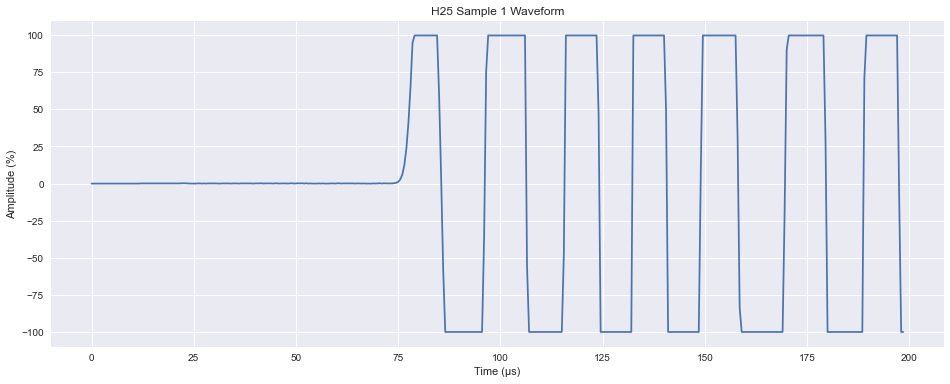

In [42]:
plt.figure(figsize=w_size)
plt.plot(time, df.iloc[5, 21:].astype(float))
plt.xlabel("Time (μs)")
plt.ylabel("Amplitude (%)")
plt.title("H25 Sample 1 Waveform")

Text(0.5, 1.0, 'B200 Sample 1 Frequency Series')

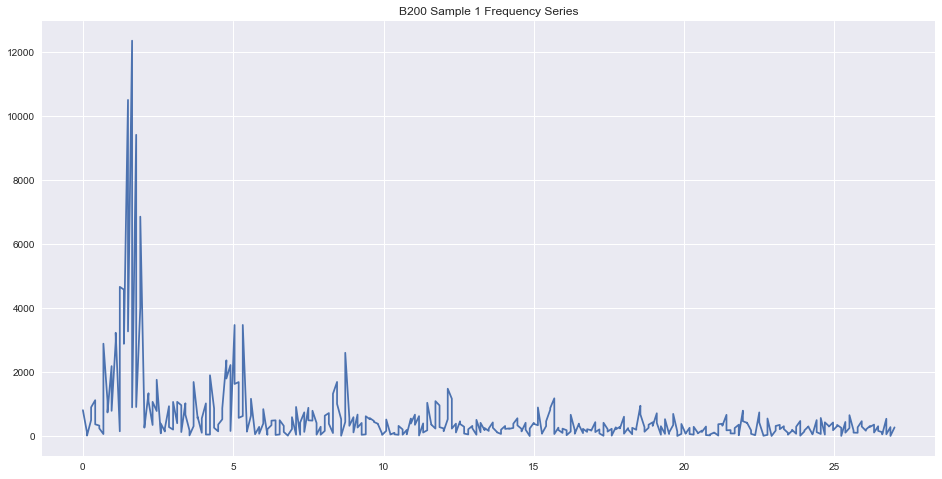

In [5]:
ft_b200_1 = rfft(df.iloc[10][23:]) #amp
freq_b200_1 = rfftfreq(len(df.iloc[10][23:]), 1/54) #freq
plt.figure(figsize=f_size)
plt.plot(freq_b200_1, np.abs(ft_b200_1))
plt.title("B200 Sample 1 Frequency Series")

In [7]:
print(pywt.families(short=False))

['Haar', 'Daubechies', 'Symlets', 'Coiflets', 'Biorthogonal', 'Reverse biorthogonal', 'Discrete Meyer (FIR Approximation)', 'Gaussian', 'Mexican hat wavelet', 'Morlet wavelet', 'Complex Gaussian wavelets', 'Shannon wavelets', 'Frequency B-Spline wavelets', 'Complex Morlet wavelets']


In [12]:
cA, cD = pywt.cwt(df.iloc[10][23:], time ,'mexh')
plt.plot(cA)

IndexError: index -2147483648 is out of bounds for axis 0 with size 1024